In [ ]:
#This Progrm uses an artificial recurrent neural network called Long Short Term Memory (LSTM) 
#to predict closing stock price of APPL INC using the past days stock price


In [ ]:
#1
#importing the libraries
import math
import pandas_datareader as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

In [ ]:
#2
#Get the stock quote
df=web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2019-12-17')
#to show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.650659
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.718646
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.859850
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.994284
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.973674
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,67.012764
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,67.183548
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,68.096771


In [ ]:
#3
#To get the no. of rows and column in dataset
df.shape

(2003, 6)

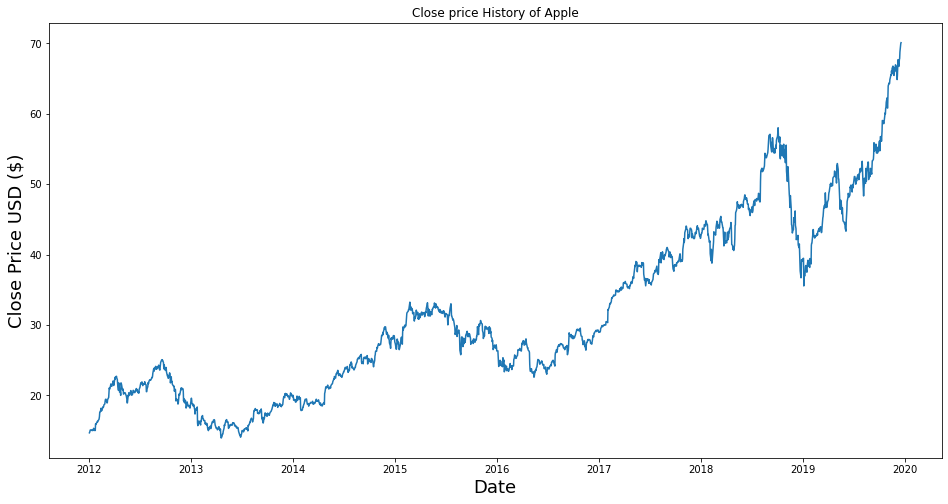

In [ ]:
#4
#visualizing closing price history
plt.rcParams["figure.figsize"] = (16,8)
plt.title('Close price History of Apple')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()


In [ ]:
#5
#creating a new dataframe with close column only
data=df.filter(['Close'])
#converting dataframe to numpy array
dataset=data.values
#getting the number of rows to train the model on
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

1603

In [ ]:
#6
#scaling the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [ ]:
#7
#creating the training dataset
train_data=scaled_data[0:training_data_len,:]
#Split the data into x_train and y_train data sets
x_train=[]  #training features
y_train=[] #target variabes

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if(i<=61):
    print(x_train)
    print(y_train)
    print()


[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01

In [ ]:
#8
#converting the x_train and y_train to np arrays
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
#9
#Reshaping the data(An LSTM network expects the input to be 3D and our data is 2D currently)
x_train.shape

(1543, 60)

In [ ]:
#10
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1543, 60, 1)

In [ ]:
#11
#building The LSTM model
model=Sequential()
#adding a layer to our model with 50 neurons
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [ ]:
#12
#Compiling the model with an optimizer and a loss function
model.compile(optimizer='adam',loss='mean_squared_error')


In [ ]:
#13
#training the model
model.fit(x_train,y_train,batch_size=1,epochs=1) 

1543/1543 [==============================] - 35s 21ms/step - loss: 0.0025


In [ ]:
#14
#Creating the scaled testing dataset
#creating a new array with scaled values from index 1543 to 2003
test_data=scaled_data[training_data_len-60:,:]
#Creating the datasets x_test and y_test
x_test=[] 
y_test=dataset[training_data_len:,:] #all the values we want our model to predict i.e actual test values
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])


In [ ]:
#15
#Converting the data to a numpy array for using in LSTM model
x_test=np.array(x_test)  

In [ ]:
#16
#reshape the data to make it 3 dim
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
#17
#getting the models predicted price values for x_test dataset
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)#unscaling the values

In [ ]:
#18
#evaluating the model by root mean square error(RMSE)
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

2.384104747772217

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


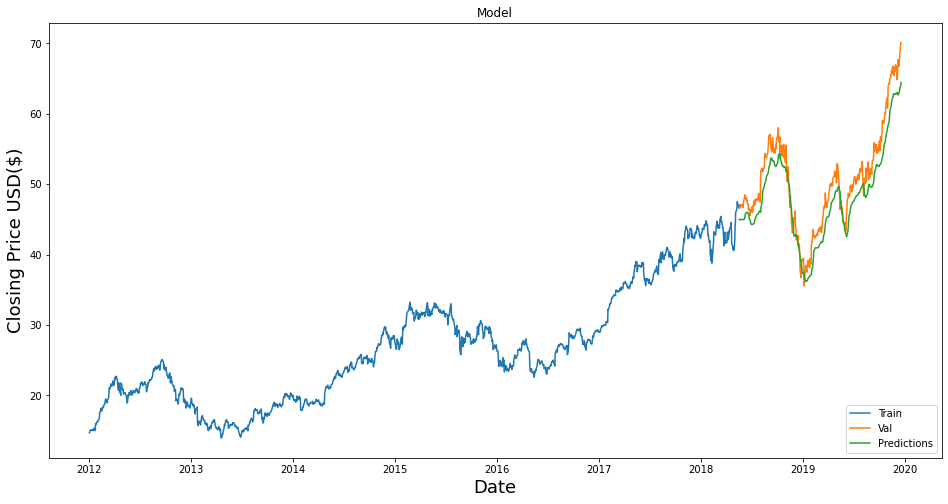

In [ ]:
#19
#plotting the data
train=data[:training_data_len]
valid=data[training_data_len:]#validation dataset
valid['Predictions']=predictions


#visualizing the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Closing Price USD($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [ ]:
#20
#showing the valid/actual price and predicted price
valid

,Close,Predictions
Date,,
2018-05-17,46.747501,44.958214
2018-05-18,46.577499,45.013405
2018-05-21,46.907501,44.998352
2018-05-22,46.790001,44.984802
2018-05-23,47.090000,44.957363
...,...,...
2019-12-11,67.692497,63.202908
2019-12-12,67.864998,63.426292
2019-12-13,68.787498,63.665649


In [ ]:
#21
#trying and predicting closing price for apple stock for a specific date
#get the quote
apple_quote=web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2019-12-17')
#creating a new dataframe
new_df=apple_quote.filter(['Close'])
#getting the last 60 day close price values and converting to an  array
last_60_days=new_df[-60:].values
#scaling the data to tye values between 0 and 
last_60_days_scaled=scaler.transform(last_60_days)
#creating an empty list
X_test=[]
#append last 60 days to the list
X_test.append(last_60_days_scaled)
#converting X_test dataset to numpy array
X_test=np.array(X_test)
#reshaping the data to 3 dimenmsion
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#getting the predicted scaled price
pred_price=model.predict(X_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print("Predicted price: ",pred_price)

Predicted price:  [[64.93803]]


In [ ]:
#22
#the model believes the closing price to be above value on 2019-12-18,seeing the actual price

apple_quote2=web.DataReader('AAPL',data_source='yahoo',start='2019-12-18',end='2019-12-18')
print("The actual price on:",apple_quote2['Close'])

The actual price on: Date
2019-12-18    69.934998
Name: Close, dtype: float64


In [ ]:
#23
#trying and predicting closing price for apple stock for a specific date
#get the quote
apple_quote=web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2020-12-17')
#creating a new dataframe
new_df=apple_quote.filter(['Close'])
#getting the last 60 day close price values and converting to an  array
last_60_days=new_df[-60:].values
#scaling the data to tye values between 0 and 
last_60_days_scaled=scaler.transform(last_60_days)
#creating an empty list
X_test=[]
#append last 60 days to the list
X_test.append(last_60_days_scaled)
#converting X_test dataset to numpy array
X_test=np.array(X_test)
#reshaping the data to 3 dimenmsion
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#getting the predicted scaled price
pred_price=model.predict(X_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print("Predicted price: ",pred_price)

Predicted price:  [[109.13787]]


In [ ]:
#24
apple_quote2=web.DataReader('AAPL',data_source='yahoo',start='2020-12-18',end='2020-12-18')
print("The actual price on:",apple_quote2['Close'])

The actual price on: Date
2020-12-18    126.660004
Name: Close, dtype: float64
